In [2]:
# Loading packages
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
from sklearn.linear_model import LinearRegression
import xarray as xr
import rioxarray as rxr
import rasterio as rio
from rasterio.enums import Resampling
from rasterio.merge import merge
from rioxarray.merge import merge_arrays
from rasterio.warp import reproject, Resampling, calculate_default_transform
from rasterio.plot import show
import matplotlib
import matplotlib.pyplot as plt
import math
import random

# Loading geocube to raterize vector polygons (https://github.com/corteva/geocube)
from geocube.api.core import make_geocube

import spyndex
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import tarfile
import pathlib
#import geowombat




import glob
import os
import os.path
import sys

In [3]:
# Function of LAI 

def LAI_func(method):
    if method == "metric":
        LAI = -(np.log((0.69-SAVI)/0.59)/0.91) 
    elif method == "metric2010":
        LAI = 11*(SAVI**3)
    elif method == "vineyard":
        LAI = 4.9*NDVI-0.46
    elif method == "MCB":
        LAI = 1.2 - 3.08 * np.exp(-2013.35 * NDVI**6.41)
    elif method == "turner":
        LAI = 0.5724 + 0.0989 * NDVI - 0.0114 * NDVI**2 + 0.0004 * NDVI**3
    return(LAI)

### LAI Bastiaanssen

In [4]:
# Calculate LAI with mean of two Formulas after Jaafar_2020
LAI = list()
 
for SAVI in np.linspace(0, 1, 100):
    LAI.append(LAI_func("metric")) 

C:\Users\nicol\AppData\Local\Temp\ipykernel_13316\3797466715.py:5: RuntimeWarning: invalid value encountered in log
  LAI = -(np.log((0.69-SAVI)/0.59)/0.91)


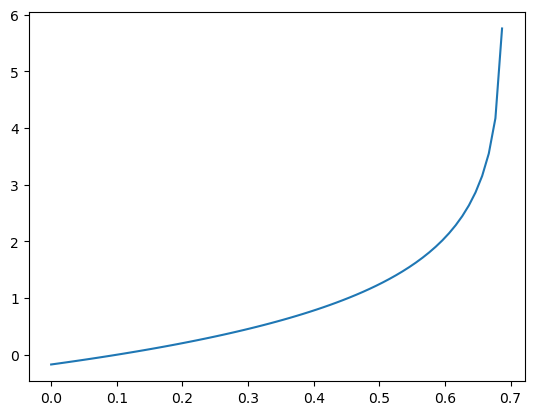

In [5]:
plt.plot(np.linspace(0, 1, 100), LAI )

### LAI Pocas

In [6]:
# Calculate LAI with mean of two Formulas after Jaafar_2020
LAI = list()
 
for SAVI in np.linspace(0, 1, 100):
    LAI.append(LAI_func("metric2010")) 

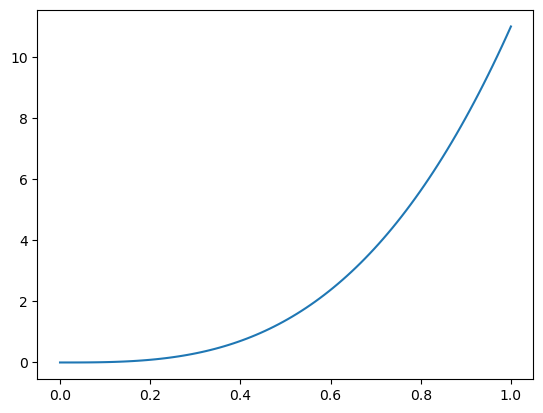

In [7]:
plt.plot(np.linspace(0, 1, 100), LAI )

### LAI Total

In [8]:
# Calculate LAI with mean of two Formulas after Jaafar_2020
LAI = list()
 
for SAVI in np.linspace(0, 1, 100):
    LAI.append((LAI_func("metric") + LAI_func("metric2010")) / 2) 

C:\Users\nicol\AppData\Local\Temp\ipykernel_13316\3797466715.py:5: RuntimeWarning: invalid value encountered in log
  LAI = -(np.log((0.69-SAVI)/0.59)/0.91)


Text(0, 0.5, 'LAI')

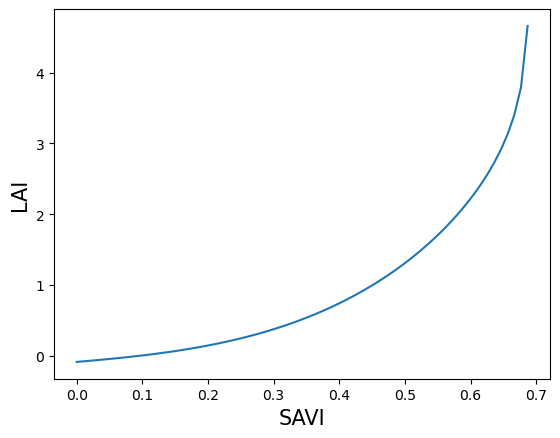

In [13]:
plt.plot(np.linspace(0, 1, 100), LAI)

font1 = {"size": 15}

plt.xlabel("SAVI", fontdict = font1)
plt.ylabel("LAI", fontdict = font1)